<a href="https://colab.research.google.com/github/Jugranada/Se-ales_sistemas/blob/main/Transformada_Place.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de sistemas: Verificación de linealidad e invariancia en el tiempo (SLIT)

El objetivo de este ejercicio es analizar diferentes sistemas discretos \( y(n) = H\{x(n)\} \), verificando si cumplen con las propiedades de **linealidad** e **invariancia en el tiempo** (SLIT).

Para cada sistema se:

- Evalúa teóricamente si es lineal e invariante en el tiempo, usando el principio de superposición y desplazamientos temporales.
- Se implementa la simulación en Python para observar el comportamiento de la salida ante entradas definidas como el escalón unitario.


 $$
y(n) = \frac{x(n)}{3} + 2x(n-1) - y(n-1)
$$

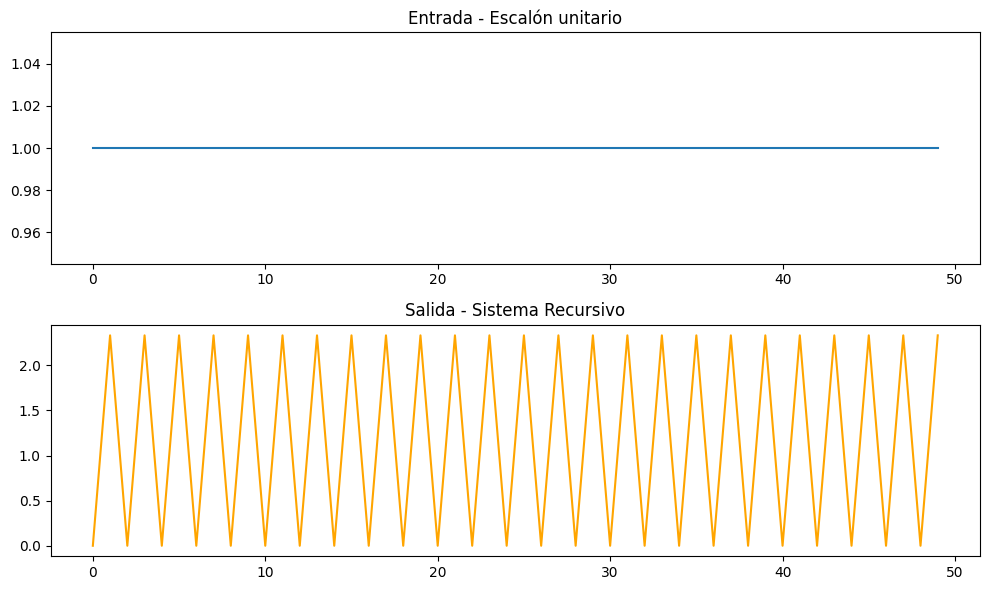

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 50  # Número de muestras
x = np.ones(N)  # Entrada tipo escalón: x(n) = 1 para todo n >= 0
y = np.zeros(N)  # Salida inicializada en 0

# Condición inicial y(n-1) = 0
# Aplicamos el sistema recursivo
for n in range(1, N):
    y[n] = (x[n] / 3) + 2 * x[n-1] - y[n-1]

# Graficamos las señales
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(x, label="Entrada x(n)")
plt.title('Entrada - Escalón unitario')
plt.subplot(2, 1, 2)
plt.plot(y, label="Salida y(n)", color='orange')
plt.title('Salida - Sistema Recursivo')
plt.tight_layout()
plt.show()



En esta simulación se implementa un sistema recursivo definido por la siguiente ecuación en diferencias:

$$
y(n) = \frac{x(n)}{3} + 2x(n-1) - y(n-1)
$$

Donde:

- \( x(n) \) es la entrada del sistema, en este caso un **escalón unitario**, es decir:

  $$
  x(n) = 1 \quad \text{para } n \geq 0
  $$

- \( y(n) \) es la salida del sistema.
- Se asume una condición inicial: \( y(-1) = 0 \).

### Descripción de las gráficas

- **Gráfica superior**: representa la entrada del sistema \( x(n) \), constante en 1 para todos los valores de \( n \).
- **Gráfica inferior**: representa la salida \( y(n) \), calculada paso a paso usando la ecuación recursiva del sistema.

### Conclusiones importantes

- A pesar de que la entrada es constante, la salida **no es constante**, sino que evoluciona dinámicamente debido a la retroalimentación (término \( y(n-1) \)).
- Se observa una **respuesta transitoria** inicial antes de que el sistema estabilice su comportamiento.
- Este tipo de sistema **no puede resolverse mediante convolución clásica** ni con la respuesta al impulso, ya que **no es lineal** (el término \( -y(n-1) \) rompe la propiedad de superposición).



$$
y(n) = \sum_{k=-\infty}^{n} x^2(k)
$$

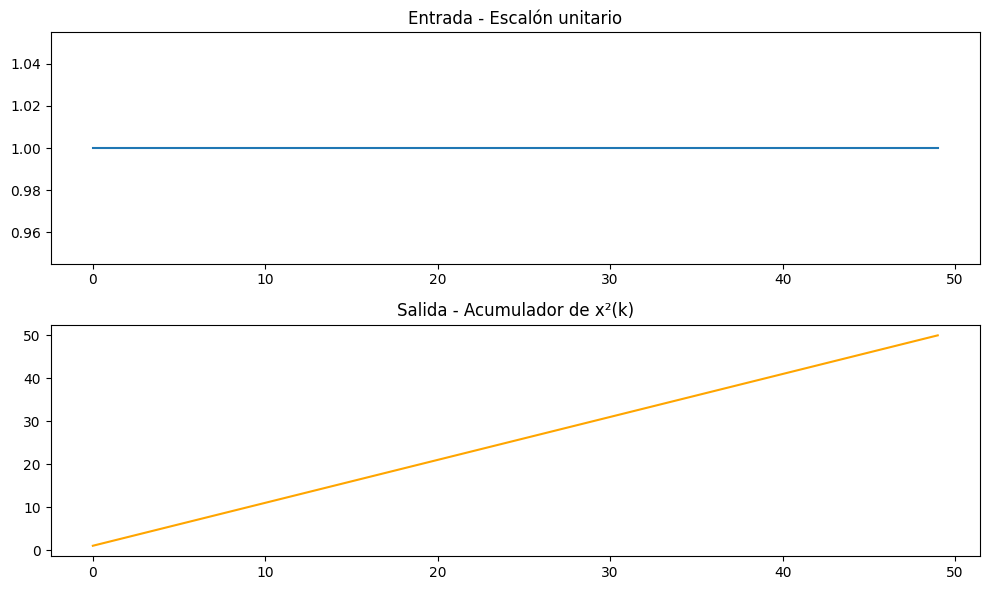

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 50  # Número de muestras
x = np.ones(N)  # Entrada tipo escalón: x(n) = 1 para todo n >= 0
y = np.zeros(N)  # Salida inicializada en 0

# Aplicamos el sistema: y(n) = sum_{k=0}^{n} x^2(k)
for n in range(N):
    y[n] = np.sum(x[:n+1]**2)  # Acumulado del cuadrado de x(k) desde k = 0 hasta n

# Graficamos las señales
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(x, label="Entrada x(n)")
plt.title('Entrada - Escalón unitario')
plt.subplot(2, 1, 2)
plt.plot(y, label="Salida y(n)", color='orange')
plt.title('Salida - Acumulador de x²(k)')
plt.tight_layout()
plt.show()


En esta simulación se implementa un sistema cuya salida está definida como la suma acumulada del cuadrado de la entrada:

$$
y(n) = \sum_{k=-\infty}^{n} x^2(k)
$$

Dado que computacionalmente no es posible calcular desde \( k = -\infty \), se asume que \( x(k) = 0 \) para \( k < 0 \). Por lo tanto, la ecuación se implementa como:

$$
y(n) = \sum_{k=0}^{n} x^2(k)
$$

Donde:

- \( x(n) \) es la señal de entrada, definida como un **escalón unitario**, es decir: \( x(n) = 1 \)
- \( y(n) \) es la salida del sistema, que representa la suma acumulativa de los cuadrados de la entrada hasta el instante \( n \).

### Descripción de las gráficas

- **Gráfica superior**: muestra la entrada del sistema \( x(n) \), que es constante e igual a 1 para todo \( n \geq 0 \).
- **Gráfica inferior**: muestra la salida \( y(n) \), que crece de forma lineal ya que se acumula el valor \( x^2(k) = 1 \) en cada paso.

### Conclusiones importantes

- La salida del sistema es una **suma acumulada** (tipo integral discreta) del cuadrado de la entrada.
- Como la entrada es constante (1), el cuadrado también es constante (1), por lo que la salida crece linealmente: \( y(n) = n + 1 \).
- Este sistema **no es lineal**, ya que la operación de elevar al cuadrado rompe la propiedad de superposición.
- Sin embargo, el sistema **sí es invariante en el tiempo**, ya que un desplazamiento en la entrada produce un desplazamiento equivalente en la salida.
- Dado que **no es lineal**, **no se puede usar la respuesta al impulso ni la convolución** para calcular su salida.

---



$$
y(n) = \text{mediana}\big(x(n-1),\ x(n),\ x(n+1)\big)
$$

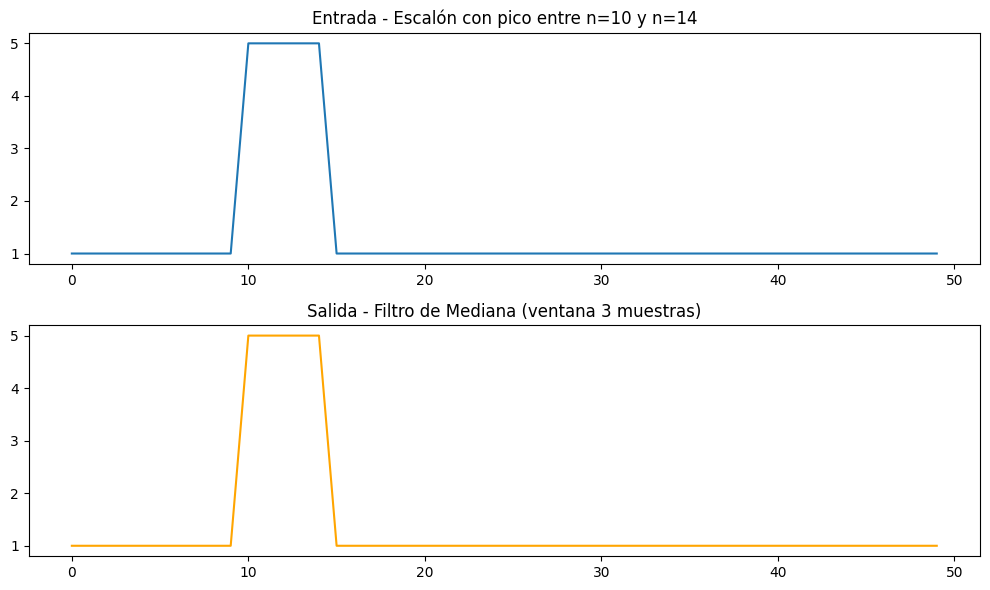

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 50  # Número de muestras
x = np.ones(N)  # Entrada tipo escalón
x[10:15] = 5    # Añadimos un pico temporal para ver el efecto del filtro mediana
y = np.zeros(N)  # Salida inicializada en 0

# Aplicamos el sistema: y(n) = mediana(x(n-1), x(n), x(n+1))
for n in range(1, N-1):  # evitamos bordes extremos
    y[n] = np.median([x[n-1], x[n], x[n+1]])

# Copiamos extremos sin procesar (opcional, depende del manejo de bordes)
y[0] = x[0]
y[-1] = x[-1]

# Graficamos las señales
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(x, label="Entrada x(n)")
plt.title('Entrada - Escalón con pico entre n=10 y n=14')
plt.subplot(2, 1, 2)
plt.plot(y, label="Salida y(n)", color='orange')
plt.title('Salida - Filtro de Mediana (ventana 3 muestras)')
plt.tight_layout()
plt.show()


En esta simulación se implementa un sistema no lineal que calcula la mediana de la entrada en una **ventana de 3 muestras** centrada en cada instante de tiempo:

$$
y(n) = \text{mediana}\big(x(n-1),\ x(n),\ x(n+1)\big)
$$

Donde:

- \( x(n) \) es la señal de entrada, compuesta por un **escalón unitario** con un **pico artificial** entre \( n = 10 \) y \( n = 14 \) para evidenciar el efecto del filtro.
- \( y(n) \) es la señal de salida, que representa la señal suavizada tras aplicar el filtro de mediana.

### Descripción de las gráficas

- **Gráfica superior**: muestra la entrada \( x(n) \), constante en 1 excepto por un pico
- **Gráfica inferior**: muestra la salida \( y(n) \), donde se puede observar cómo el filtro de mediana elimina los picos, preservando el resto de la forma de la señal.

### Conclusiones importantes

- El filtro de mediana es **no lineal**, ya que no cumple la propiedad de superposición (la mediana de dos señales no equivale a la mediana de sus combinaciones).
- El sistema **sí es invariante en el tiempo**, ya que desplazar la entrada produce una salida igualmente desplazada.
- **No se puede usar convolución ni respuesta al impulso**, debido a que el sistema no es lineal.

---


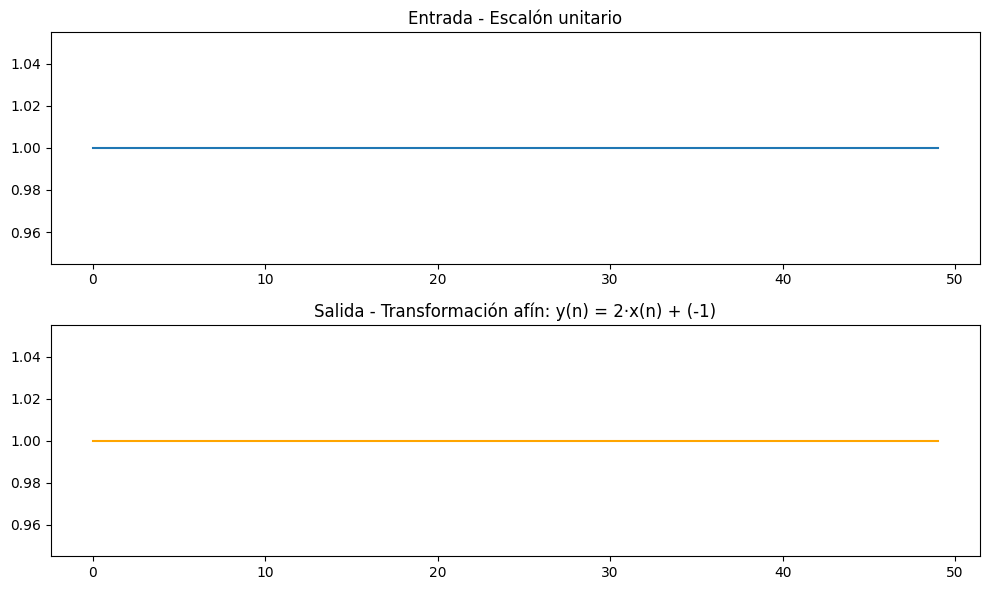

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 50  # Número de muestras
A = 2   # Ganancia
B = -1  # Desplazamiento
x = np.ones(N)  # Entrada tipo escalón: x(n) = 1 para todo n >= 0
y = A * x + B   # Salida: y(n) = A * x(n) + B

# Graficamos las señales
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(x, label="Entrada x(n)")
plt.title('Entrada - Escalón unitario')
plt.subplot(2, 1, 2)
plt.plot(y, label="Salida y(n)", color='orange')
plt.title(f'Salida - Transformación afín: y(n) = {A}·x(n) + ({B})')
plt.tight_layout()
plt.show()


En esta simulación se analiza un sistema discreto definido por la siguiente relación entre la entrada y la salida:

$$
y(n) = A \cdot x(n) + B
$$

Donde:

- \( x(n) \) es la señal de entrada, que en este caso es un **escalón unitario**: \( x(n) = 1 \)
- \( A \) es una constante de **ganancia**.
- \( B \) es un término constante
- \( y(n) \) es la señal de salida resultante de aplicar la transformación lineal y el desplazamiento.

En la simulación se utilizaron los valores:

- \( A = 2 \)
- \( B = -1 \)

Por lo tanto, como \( x(n) = 1 \), se tiene:

$$
y(n) = 2 \cdot 1 + (-1) = 1 \quad \text{para todo } n
$$

### Descripción de las gráficas

- **Gráfica superior**: muestra la entrada \( x(n) \), que es constante e igual a 1 para todos los valores de \( n \).
- **Gráfica inferior**: muestra la salida \( y(n) \), que también es constante, resultado de aplicar la transformación

### Conclusiones importantes

- Este sistema es **lineal**, ya que cumple con la propiedad de superposición: si se combinan entradas, las salidas también se combinan de manera correspondiente.
- También es **invariante en el tiempo**, ya que un desplazamiento en la entrada produce un desplazamiento idéntico en la salida.
